# Glass Refractive Indices

**Scott Prahl**

**20 Jan 2020, Version 2**

In [1]:
# Execute this cell first
%matplotlib inline
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber.refraction as ofr
except:
    print("***** You need to install my ofiber module first           *****")
    print("***** Execute the following line in a new cell, then retry *****")
    print()
    print("!{sys.executable} -m pip install ofiber")

import ofiber.cylinder_step as ofc
import ofiber.dispersion as ofd

## Routines to work with refractive index

The interface is a bit weird.  Basically, you need to get the Sellmeier coefficients for the type of glass that you want.  Fortunately, this module has a bunch of glasses entered already.  The list is called `ofr.ALL_GLASS_NAMES`.

In [2]:
print(ofr.ALL_GLASS_NAMES)

['SiO2' 'GeO2' '9.1% P2O2' '13.3% B2O3' '1.0% F' '16.9% Na2O : 32.5% B2O3'
 'ABCY' 'HBL' 'ZBG' 'ZBLA' 'ZBLAN' '5.2% B2O3' '10.5% P2O2' 'N-BK7'
 'fused silica' 'sapphire (ordinary)' 'sapphire (extraordinary)'
 'MgF2 (ordinary)' 'MgF2 (extraordinary)' 'CaF2' 'F2' 'F5' 'FK5HTi' 'K10'
 'K7' 'LAFN7' 'LASF35' 'LF5' 'LF5HTi' 'LLF1' 'LLF1HT' 'N-BAF1' 'N-BAF4'
 'N-BAF5' 'N-BAF5' 'N-BAK1' 'N-BAK2' 'N-BAK4' 'N-BALF' 'N-BALF' 'N-BASF'
 'N-BASF' 'N-BK10' 'N-F2' 'N-FK5' 'N-FK51' 'N-FK58' 'N-K5' 'N-KF9'
 'N-KZFS' 'N-KZFS' 'N-KZFS' 'N-KZFS' 'N-KZFS' 'N-LAF2' 'N-LAF2' 'N-LAF3'
 'N-LAF3' 'N-LAF3' 'N-LAF7' 'N-LAK1' 'N-LAK1' 'N-LAK1' 'N-LAK2' 'N-LAK2'
 'N-LAK3' 'N-LAK3' 'N-LAK7' 'N-LAK8' 'N-LAK9' 'N-LASF' 'N-LASF' 'N-LASF'
 'N-LASF' 'N-LASF' 'N-LASF' 'N-LASF' 'N-LASF' 'N-LASF' 'N-PK51' 'N-PK52'
 'N-PSK3' 'N-PSK5' 'N-SF1' 'N-SF10' 'N-SF11' 'N-SF14' 'N-SF15' 'N-SF2'
 'N-SF4' 'N-SF5' 'N-SF57' 'N-SF6' 'N-SF66' 'N-SF6H' 'N-SF8' 'N-SK11'
 'N-SK14' 'N-SK16' 'N-SK2' 'N-SK4' 'N-SK5' 'N-SSK2' 'N-SSK5' 'N-SSK8'
 'N-

You can just count to find the glass you want.  Standard silicon dioxide SiO$_2$ has index 0.  Germanium dioxide GEO$_2$ has index 1.

Alternatively you can search for the glass you want.  The index of BK7 is 13.

In [3]:
ofr.find_glass("BK7")


13

So `ofr.glass(13)` will return the coefficients for BK7 glass for example.  The function `ofr.n(glass,lambda0)` returns the index of refraction at a particular (vacuum) wavelength $\lambda_0$.

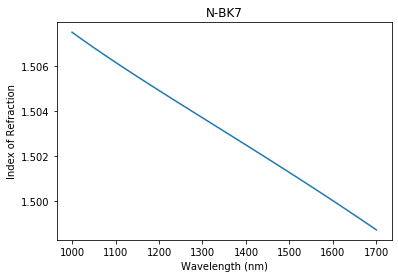

In [4]:
glass = ofr.glass(13)
name = ofr.glass_name(13)
lambda0 = np.linspace(1000,1700,100)*1e-9
n = ofr.n(glass,lambda0)
plt.plot(lambda0*1e9,n)
plt.title(name)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Index of Refraction')
plt.show()

# SiO$_2$ and GeO$_2$ fibers

These are the mainstay of the optical fiber industry.  By doping SiO$_2$ with GeO$_2$ different refractive index profiles can be achieved.  This plot shows the limits of 100% of each material.  They look pretty similar, just displaced by 0.14 index units.

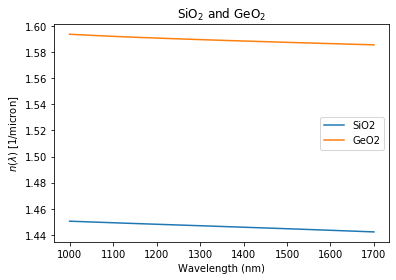

In [5]:
glass = ofr.glass(0)
name = ofr.glass_name(0)
lambda0 = np.linspace(1000,1700,100)*1e-9
n = ofr.n(glass,lambda0)
plt.plot(lambda0*1e9,n,label=name)

glass = ofr.glass(1)
name = ofr.glass_name(1)
lambda0 = np.linspace(1000,1700,100)*1e-9
n = ofr.n(glass,lambda0)
plt.plot(lambda0*1e9,n,label=name)

plt.title("SiO$_2$ and GeO$_2$ ")
plt.xlabel('Wavelength (nm)')
plt.ylabel('$n(\lambda)$ [1/micron]')
plt.legend()
plt.show()

However, if you plot the first derivative, interesting things appear.  Notice the weird units on the vertical axis.

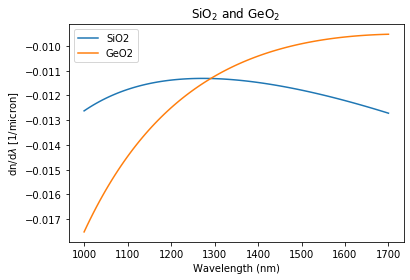

In [6]:
glass = ofr.glass(0)
name = ofr.glass_name(0)
lambda0 = np.linspace(1000,1700,100)*1e-9
dn = ofr.dn(glass,lambda0)
plt.plot(lambda0*1e9,dn*1e-6,label=name)

glass = ofr.glass(1)
name = ofr.glass_name(1)
lambda0 = np.linspace(1000,1700,100)*1e-9
dn = ofr.dn(glass,lambda0)
plt.plot(lambda0*1e9,dn*1e-6,label=name)

plt.title("SiO$_2$ and GeO$_2$ ")
plt.xlabel('Wavelength (nm)')
plt.ylabel('dn/d$\lambda$ [1/micron]')
plt.legend()
plt.show()

# SiO$_2$ doped with GeO$_2$ 

Since doping of SiO$_2$ with GeO$_2$ is common there is a special routine to generate Sellmeier coefficients for glass doped with a specific fraction $x$ of GeO$_2$.  The interface is simple.

In [7]:
help(ofr.doped_glass)

Help on function doped_glass in module ofiber.refraction:

doped_glass(x)
    Calculate Sellmeier coefficients for SiO_2 doped with GeO_2
    
    Arg:
        x = molar fraction of GeO_2 in the system,
                x * GeO_2 : (1 - x) * SiO_2
    Returns:
        Sellmeier coefficients for doped glass (array of six values)



Here the second derivative of the refractive index is plotted for 100% SiO$_2$, 100% GeO$_2$, and 10% GeO$_2$

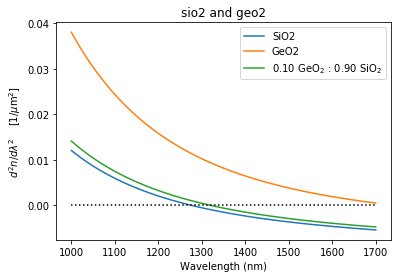

In [8]:
glass = ofr.glass(0)
name = ofr.glass_name(0)
lambda0 = np.linspace(1000,1700,100)*1e-9
d2n = ofr.d2n(glass,lambda0)
plt.plot(lambda0*1e9,d2n*1e-12,label=name)

glass = ofr.glass(1)
name = ofr.glass_name(1)
lambda0 = np.linspace(1000,1700,100)*1e-9
d2n = ofr.d2n(glass,lambda0)
plt.plot(lambda0*1e9,d2n*1e-12,label=name)

glass = ofr.doped_glass(0.10)
name = ofr.doped_glass_name(0.1)
lambda0 = np.linspace(1000,1700,100)*1e-9
d2n = ofr.d2n(glass,lambda0)
plt.plot(lambda0*1e9,d2n*1e-12,label=name)

plt.plot([1000,1700],[0,0],':k')
plt.title("sio2 and geo2")
plt.xlabel('Wavelength (nm)')
plt.ylabel('$d^2n/d\lambda^2$    [1/$\mu$m$^2$]')
plt.legend()
plt.show()

If we just want the second derivative at a specific wavelength, that is simple too.  The only tricky part is converting from the default 1/m$^2$ to 1/µm$^2$

In [9]:
lambda0 = 1550e-9
glass=ofr.glass(0)
name=ofr.glass_name(0)
disp = ofr.d2n(glass,lambda0)
print('d2n/dlambda1 of %s at %.0f nm is %.4f/um**2'%(name,lambda0*1e9,disp*1e-12))

d2n/dlambda1 of SiO2 at 1550 nm is -0.0042/um**2


We can calculate use this to calculate the material, waveguide, and total dispersion for a fiber.  (These are available directly in the `ofiber.dispersion` module.  This is just an example.)

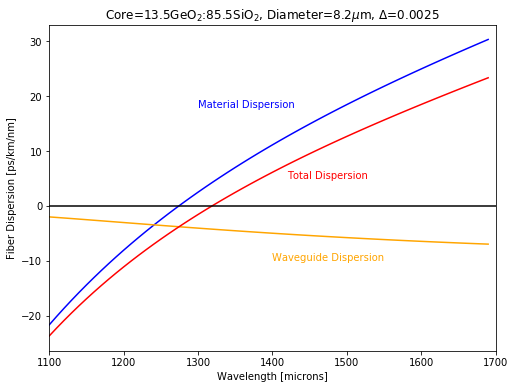

In [10]:
# Ghatak Section 3.A.1, page 85.  
#
c = scipy.constants.speed_of_light      # [m/s] 

a = 4.1e-6          # [m] Fiber radius
delta = 0.0025      # Fractional change in the index of refraction

start = 1100
finish = 1700
resolution = 10

lambda0 = np.arange(start,finish,resolution)*1e-9
npoints = len(lambda0)

glass=ofr.glass(0)
n1 = ofr.n(glass,lambda0)
d2n = ofr.d2n(glass,lambda0)

V = (2*np.pi/lambda0)*a*n1*np.sqrt(2*delta) 

# Material Dispersion
M = -(lambda0/c)*d2n

# Waveguide dispersion
Dw = -n1*(1+delta)*delta/c/lambda0*(0.080+0.549*(2.834-V)**2)

ps_nm_km = 1e-12/1e-9/1e3
plt.subplots(1,1, figsize=(8,6))
plt.plot(lambda0*1e9,M/ps_nm_km,color='blue')

plt.plot(lambda0*1e9,Dw/ps_nm_km,color='orange')
plt.plot(lambda0*1e9,(M+Dw)/ps_nm_km,color='red')
plt.plot([1100,1700],[0,0],'k')
plt.xlabel('Wavelength [microns]')
plt.ylabel('Fiber Dispersion [ps/km/nm]')
plt.title('Core=13.5GeO$_2$:85.5SiO$_2$, Diameter=%.1f$\mu$m, $\Delta$=%.4f'%(a*2e6,delta))
plt.xlim(1100,1700)
plt.annotate('Total Dispersion', xy=(1420,5),color='red')
plt.annotate('Material Dispersion', xy=(1300,18),color='blue')
plt.annotate('Waveguide Dispersion', xy=(1400,-10),color='orange')
plt.show()